# Week 3 Census Data Exploration Assignment
In this assignment, I analyze Census data from the [2024 Living Atlas Dataset](https://github.com/cgiamarino9/PubAff405_S25/blob/main/Weeks/Week03%20Census%20Data/data/LACountyTracts24.zip) provided during lecture to explore its relevance to my research on small business distribution in Los Angeles County. Specifically, I focus on two key variables: **Daytime Population: Workers** and tract **Population Density**, which I calculated by dividing the total population by the land area in square miles to standardize across geographic units.   </br>


##### The following code cell imports the pandas and geopandas libraries. 

In [69]:
#mporting libraries
import pandas as PD
import geopandas as gpd

##### The following code cell allows me to access the data I will be exploring.

In [70]:
# reads file and saves data as 'rawData'
rawData=gpd.read_file('data/LACountyTracts24.zip')

#### rawData was saved. 
Using **.head()** allows me to preview the first few rows of the dataset and gain a quick understanding of its structure and contents.

In [71]:
rawData.head()

,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,...,NHSPWHT__1,NHSPBLK__1,NHSPAI_CY_,NHSPASN__1,NHSPPI_CY_,NHSPOTH__1,NHSPMLT__1,HSGRAD_LES,BACHDEG_PL,geometry
0,06037262302,060372623.02,California,CA,1.182838,2782,2765,17,2352.0,1141,...,79.295471,1.042416,0.000000,6.506111,0.000000,1.006470,5.140187,0.824043,83.131362,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,060372062.01,California,CA,0.077543,2863,2202,661,36941.9,1262,...,20.852253,16.590988,1.012924,28.815927,0.419141,0.838282,4.680405,9.677419,45.822994,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,060371281.02,California,CA,0.250507,4755,4521,234,18982.0,1479,...,18.401682,5.005258,0.042061,5.615142,0.147213,0.672976,1.451104,25.774135,17.941712,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,060371317.01,California,CA,0.254699,4591,4575,16,18025.1,1741,...,23.175779,5.968199,0.174254,21.367894,0.043563,0.588107,3.724679,17.841079,34.002999,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,060372328.00,California,CA,0.164729,3927,3858,69,23843.4,968,...,0.993125,12.554113,0.254647,0.611154,0.000000,0.891266,1.120448,43.775763,10.634790,"POLYGON ((-13166681.241 4028231.101, -13166681..."


##### I reviewed the [Esri data dictionary](https://www.arcgis.com/home/item.html?id=b0b3b31e531e406185f2de4fff596060) to better understand the available variables and determine which ones are most relevant to my research. Based on this review, I decided to focus on the following:
1. FIP
2. Area Square Miles
3. Total Population
4. Household Population
5. Total Daytime Population
6. **Daytime Population: Workers**
7. Daytime Population: Residents
8. Households in Low Income Tier
9. Households in Middle Income Tier
10. Households in Upper Income Tier
11. Geometry

In [72]:
# I will be storing the following columns to further evaluate the data.
fields_to_eval = ['ID', 'AREA', 'TOTPOP_CY',
                      'HHPOP_CY', 'DPOP_CY', 
                      'DPOPWRK_CY', 'DPOPRES_CY',
                      'LOTRHH_CY', 'MDTRHH_CY',
                      'UPTRHH_CY', 'geometry']

# The fields I am interested in further studying are saved in a new dataframe named 'cleanedData'
cleanedData = rawData[fields_to_eval]

##### I renamed the columns to make them easier to read and interpret during analysis.

In [73]:
# Udpated column names so it's easier to evaluate the dataframe. 
cleanedData.columns = [ 'FIPS', 'Area Square Miles', 'Total Population',
                        'Household Population', 'Total Daytime Population',
                        'Daytime Population: Workers', 'Daytime Population: Residents',
                        'Households in Low Income Tier', 'Households in Middle Income Tier',
                        'Households in Upper Income Tier', 'geometry']

# Used .head() to ensure the data was titles correctly.
cleanedData.head()

,FIPS,Area Square Miles,Total Population,Household Population,Total Daytime Population,Daytime Population: Workers,Daytime Population: Residents,Households in Low Income Tier,Households in Middle Income Tier,Households in Upper Income Tier,geometry
0,06037262302,1.182838,2782,2765,3505,1939,1566,160,311,670,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,0.077543,2863,2202,3794,2138,1656,624,528,110,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,0.250507,4755,4521,3894,1603,2291,439,1000,40,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,0.254699,4591,4575,2919,584,2335,376,1020,345,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,0.164729,3927,3858,2580,251,2329,430,468,70,"POLYGON ((-13166681.241 4028231.101, -13166681..."


##### I created a copy of the DataFrame in order to add a new column calculating population density per square mile. 


In [76]:
# copied the dataframe to make further modifications. 
subsetData = cleanedData.copy()

# Created a new column for population density
subsetData['Population Density'] = subsetData['Total Population'] / subsetData['Area Square Miles']

# used .head() to ensure the population density column was calculated correctly
subsetData.head()

,FIPS,Area Square Miles,Total Population,Household Population,Total Daytime Population,Daytime Population: Workers,Daytime Population: Residents,Households in Low Income Tier,Households in Middle Income Tier,Households in Upper Income Tier,geometry,Population Density
0,06037262302,1.182838,2782,2765,3505,1939,1566,160,311,670,"POLYGON ((-13187629.788 4038588.873, -13187642...",2351.971364
1,06037206201,0.077543,2863,2202,3794,2138,1656,624,528,110,"POLYGON ((-13162511.881 4035572.196, -13162582...",36921.455345
2,06037128102,0.250507,4755,4521,3894,1603,2291,439,1000,40,"POLYGON ((-13184678.486 4053894.2, -13184921.4...",18981.527266
3,06037131701,0.254699,4591,4575,2919,584,2335,376,1020,345,"POLYGON ((-13197317.144 4055820.492, -13197556...",18025.189901
4,06037232800,0.164729,3927,3858,2580,251,2329,430,468,70,"POLYGON ((-13166681.241 4028231.101, -13166681...",23839.172584


##### I used the **.describe()** function on the Population Density column to examine its statistical distribution.

In [77]:
subsetData['Population Density'].describe()

count      2533.000000
mean      13038.687583
std       11003.310901
min           0.000000
25%        6287.042053
50%       10339.616456
75%       17053.278764
max      106342.959101
Name: Population Density, dtype: float64

##### To better understand the distribution of population density, I created a visual plot to complement the summary statistics.

<Axes: ylabel='Frequency'>

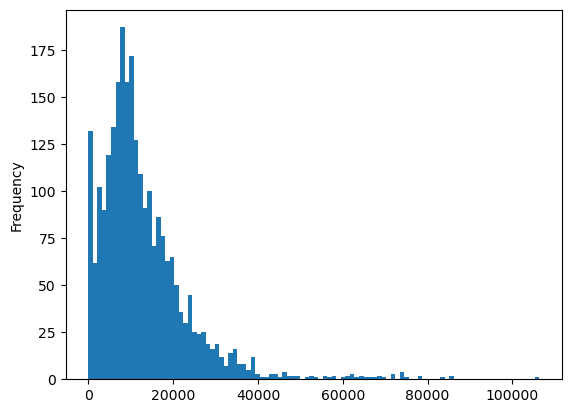

In [53]:
subsetData['Population Density'].plot.hist(bins=100)

#### Mapping Population Density


Based on the skewed distribution of population density values, I used the **NaturalBreaks** to more accurately group similar areas and visualize the data on a map of Los Angeles County.

<Axes: >

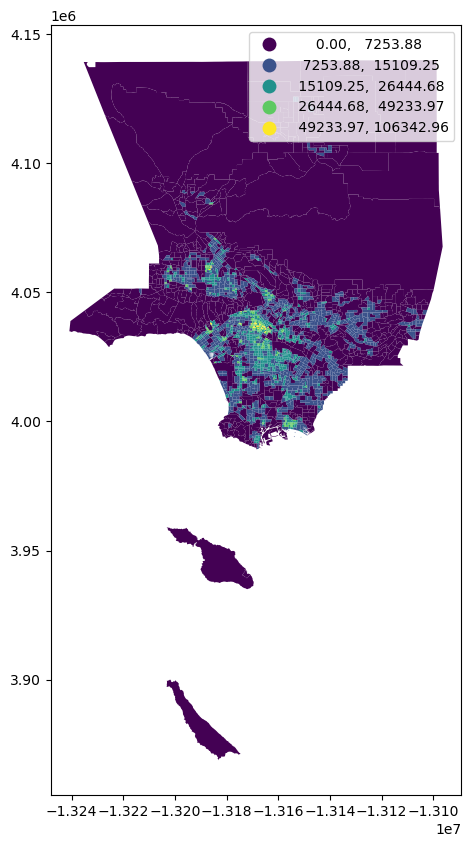

In [78]:
subsetData.plot(figsize=(12,10),
                column = 'Population Density',
                legend = True,
                scheme = 'NaturalBreaks')

### Daytime Population: Workers
Next, I will examine the **Daytime Population: Workers** variable. Since my research focuses on small businesses in Los Angeles County, the availability of a local workforce is a key factor in understanding where businesses are likely to thrive.

In [81]:
# Like with Population Density, I used .describe() to understand the distribution
# of the Daytime Population: Workers field. 

subsetData['Daytime Population: Workers'].describe()

count     2533.000000
mean      1930.460719
std       3616.287182
min          0.000000
25%        529.000000
50%        971.000000
75%       1905.000000
max      63662.000000
Name: Daytime Population: Workers, dtype: float64

##### Plotting the Daytime Population: Workers confirms the data is skewed. 

<Axes: ylabel='Frequency'>

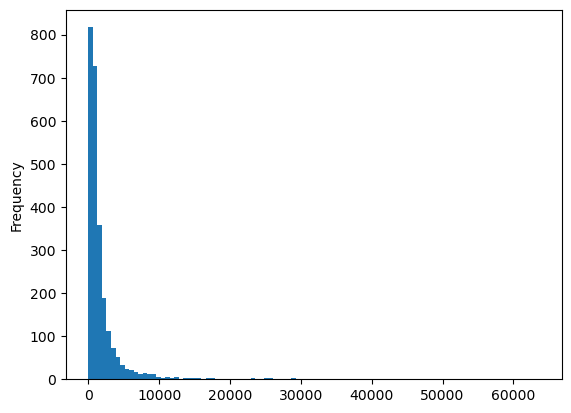

In [84]:
subsetData['Daytime Population: Workers'].plot.hist(bins=100)

#### Mapping the **Daytime Population: Workers** field

By plotting Daytime Population: Workers, I can visually identify where the majority of workers are concentrated within the county. This insight will be valuable for comparing these workforce hubs with the locations of local small business vendors doing business with the County.

<Axes: >

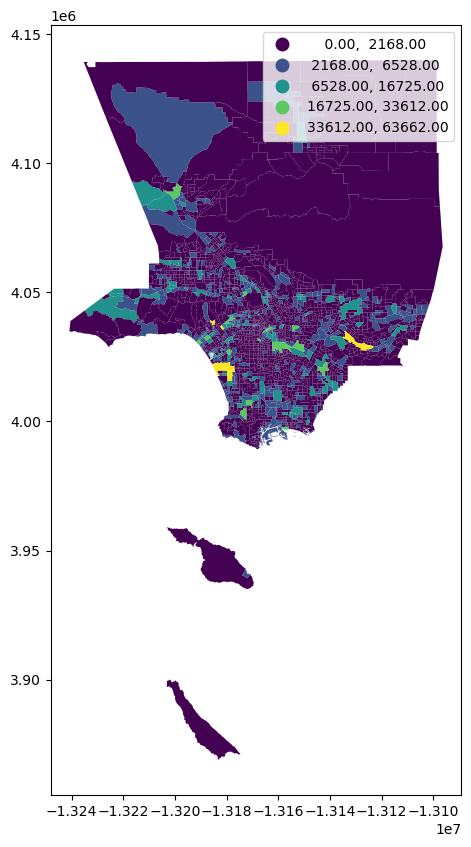

In [61]:
subsetData.plot(figsize=(12,10),
                column = 'Daytime Population: Workers',
                legend = True,
                scheme = 'NaturalBreaks')